# Project: Investigate a Medical Dataset (To determine the characteristics behind a patient showing or not showing for a scheduled appointment)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
>**This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row**

>You can see the more details about each charasteristics below:

| N° 	| Feature        	| Description                                                                                                                                	|
|:----:	|:----------------	|:--------------------------------------------------------------------------------------------------------------------------------------------	|
| 1  	| **PatientId**      	| Identification of a patient                                                                                                                	|
| 2  	| **AppointmentID**  	| The day someone called or registered the appointment, this is before appointment of course.                                                	|
| 3  	| **Gender**         	| Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.                          	|
| 4  	| **ScheduledDay**   	| The day of the actuall appointment, when they have to visit the doctor.                                                                    	|
| 5  	| **AppointmentDay** 	| The day someone called or registered the appointment, this is before appointment of course.                                                	|
| 6  	| **Age**            	| How old is the patient.                                                                                                                    	|
| 7  	| **Neighbourhood**  	| Where the appointment takes place.                                                                                                         	|
| 8  	| **Scholarship**    	| True of False . Observation, this is a broad topic, consider reading this article [here](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia) 	|
| 9  	| **Hipertension**   	| True or False                                                                                                                              	|
| 10 	| **Diabetes**       	| True or False                                                                                                                              	|
| 11 	| **Alcoholism**     	| True or False                                                                                                                              	|
| 12 	| **Handcap**        	| True or False                                                                                                                              	|
| 13 	| **SMS_received**   	| 1 or more messages sent to the patient.                                                                                                    	|
| 14 	| **No-show**        	| 'No' the patient showed up;'Yes' for a no-show                                                                                             	|

<br/>

> This study will be purely descriptive,and i will focus on only 6 vaiables, one dependent variable called `No-show` and 4 independents variables which are : `Gender`, `Age`, `Scholarship`, `Hipertension`.

<br/>


# Questions
### Main: What are the characteristics that surounds if a patient show up for appointment or not

>1. What are the percentage of male and female that show up
>2. What are the percentage of male and female that don't show up
>3. How does Having a scholarship or not having one affects showing up rate
>4. How does our independent features correlates wit each other and our dependent variables
>5. what are the mean Age of people that show up and people that don't

In [1]:
# import relevent libaries
#read in the data using pandas
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016 (1).csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# Lets us take a look at the shape of our data
print('This data containts {} rows and {} columns'.format(df.shape[0],df.shape[1]))

This data containts 110527 rows and 14 columns


In [4]:
# check if our data has any duplicate and null values
print(df.isnull().any()) #returns false for all column if there is no missisng value

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool


In [5]:
# check if our data has any duplicate
print(df.duplicated().any()) #returns False if there is no duplictaes

False


In [6]:
# lets us investigate the columns to see the data type of each
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The dataset contains 6 integer columns , 1 floats columns and 5 python objects columns(usually strings)

### Lets take our exploration further to get the summary statistics of all integer columns in our data

In [7]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


We could see from this statistics that

1. The mean age of people that booked Appointment is 37 and that 75% of them are below 18 and 50% of them have age values below 37 which is the median age value. Also you can see that there is a misrepresentation in the Age column with an obsversation that has a value of -1 that has to be removed.
2. That most of the patient that schedule appointment is not hipertensive, not Diabetic, Not Handicapped, Is without a Scholarship and doesn't take Alcohol
3. More people that recieve SMS

### Data Cleaning 

In [8]:
#Before further exploration drop columns not needed
drop_features = ['PatientId', 'AppointmentID','ScheduledDay','AppointmentDay',\
                 'Neighbourhood', 'Alcoholism', 'Handcap', 'SMS_received',  'Diabetes']
df.drop(drop_features,axis=1, inplace=True)
df.head()

,Gender,Age,Scholarship,Hipertension,No-show
0,F,62,0,1,No
1,M,56,0,0,No
2,F,62,0,0,No
3,F,8,0,0,No
4,F,56,0,1,No


In [9]:
#make the column name consistent
columns = [column.lower().replace('-','_') for column in df.columns]
print(columns)

['gender', 'age', 'scholarship', 'hipertension', 'no_show']


In [10]:
df.columns = columns

In [11]:
df.head()

,gender,age,scholarship,hipertension,no_show
0,F,62,0,1,No
1,M,56,0,0,No
2,F,62,0,0,No
3,F,8,0,0,No
4,F,56,0,1,No


In [12]:
#remap values in Gender and No-show to make them consistent
df.gender = df.gender.map({'F':'female','M':'male'})

df.no_show = df.no_show.map({'No':True,'Yes':False})
df.head(2)

,gender,age,scholarship,hipertension,no_show
0,female,62,0,1,True
1,male,56,0,0,True


In [13]:
#remove incorect observation row from Age
incorrect_row = df.query('age < 0').index
df.drop(incorrect_row,axis=0,inplace=True)

In [14]:
#lets us divide our dataset into two to help us with the filtering
show_up = df.no_show == True
no_show = df.no_show == False

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1
>1. What are the proportion  of male and female that show up
>2. What are the proportion of male and female that don't show up

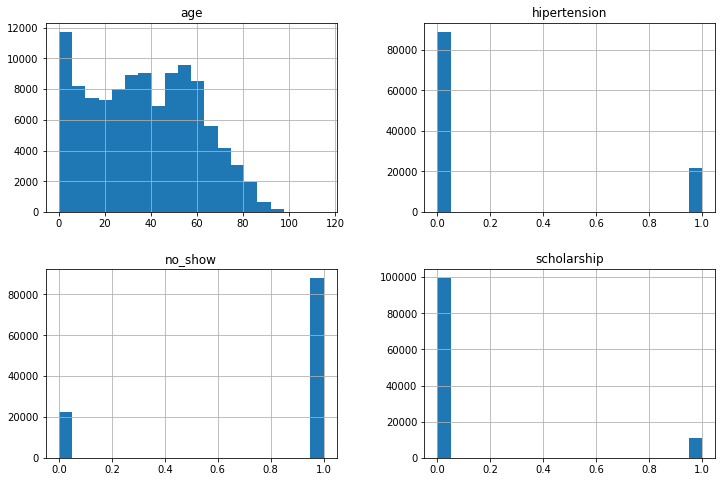

In [15]:
df.hist(figsize=(12,8), bins=20);

From this histogram plots you can see the following
1. age is skewed to the right showing that more people below `60 years` scheduled appointments
2. more people without hipertension scheduled appointment
3. more people showed up for appointment
4. a lot of people that scheduled apppointment doesn't have a scholarship

In [16]:
# Lets us take a look at the total proportion of male and female in our data
print('we have {} patients in our dataset'.format(df.shape[0]))
print(df.gender.value_counts(normalize=True))


we have 110526 patients in our dataset
female    0.649974
male      0.350026
Name: gender, dtype: float64


In [17]:
#let us now answer the first  question in our research questions
# What are the proportion of male and female that show up
print('total number of patient thats showed up  are: {}'.format(show_up.sum()))
print(df.query('no_show')['gender'].value_counts(normalize=True) *100)

total number of patient thats showed up  are: 88207
female    64.898477
male      35.101523
Name: gender, dtype: float64


in the `88207` patients that showed up, `65 percent` are females, `35 percent` are males

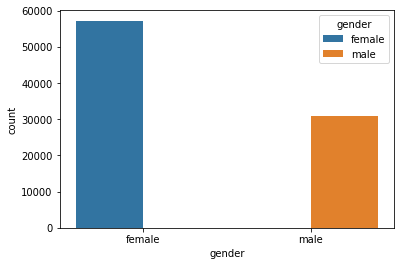

In [18]:
#let us look at the visual
x = 'gender'
sb.countplot(x,data=df[show_up],hue='gender');

In [19]:
#let us now answer the second  question in our research questions
#What are the percentage of male and female that don't show up
print('total number of patient thats showed up  are: {}'.format(no_show.sum()))
print(df.query('no_show==False')['gender'].value_counts(normalize=True) *100)

total number of patient thats showed up  are: 22319
female    65.388234
male      34.611766
Name: gender, dtype: float64


in the `22319` patients that didn't show up showed up, `65 percent` are females, and approximately `35 percent` are males

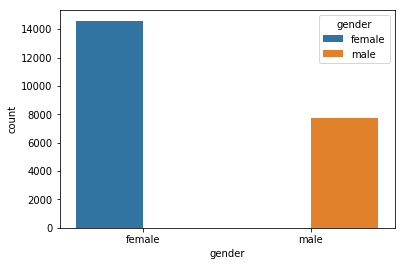

In [20]:
# let us confirm that visually
x = 'gender'
sb.countplot(x,data=df[no_show],hue='gender');

### Research Question 2 
>3. How does Having a scholarship or not having one affects showing up rate

In [21]:
# let us ascertain the number of people with scholarship that showed up and didn't show up
df.query('scholarship == True')['no_show'].value_counts()

True     8283
False    2578
Name: no_show, dtype: int64

It looks like more people without scholarship showed up. we can't take any infernece on why but it appears having a scholarship doesn't determine if a patient show up for appointment or not

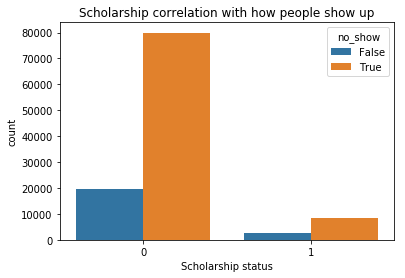

In [22]:
#Lets confirm this visually
sb.countplot('scholarship', data=df, hue='no_show');
plt.xlabel('Scholarship status')
plt.title('Scholarship correlation with how people show up');

## Research Question 3

>4. How does our independent features correlates wit each other and our dependent variables

In [23]:
# lets us look at the correlation of the colums with each other
corr = df.corr()
corr

,age,scholarship,hipertension,no_show
age,1.000000,-0.092463,0.504586,0.060327
scholarship,-0.092463,1.000000,-0.019730,-0.029134
hipertension,0.504586,-0.019730,1.000000,0.035704
no_show,0.060327,-0.029134,0.035704,1.000000


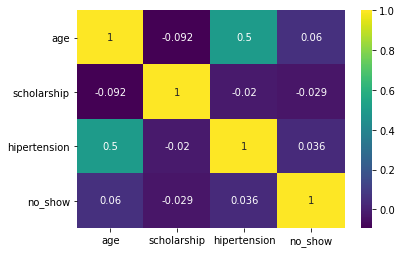

In [24]:
# using seaborn beautiful method lets confirm this visually
sb.heatmap(corr,annot=True,cmap='viridis');

In [25]:
# lets see how each column correlates with no_show column
corr['no_show']

age             0.060327
scholarship    -0.029134
hipertension    0.035704
no_show         1.000000
Name: no_show, dtype: float64

>None of the columns are strongly positive correlated with our dependent variable. But the scholarship column is strongly negatively correlated it, but this doesn't infer anything regardless because it could be it happened by chance.We can't draw conclusion

> Another thing we can see from this visualization is that age is moderately positively correlated with hipertension by 50 percent

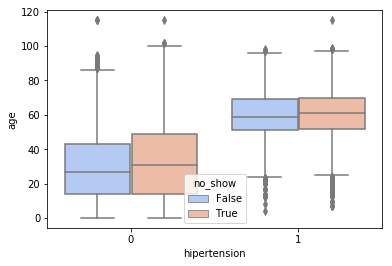

In [26]:
# let us investigate more visually
sb.boxplot(x="hipertension",y="age",hue="no_show",data=df, palette="coolwarm");

It appears that as a patient grow older they are more likely to become hipertenisve. 
From this plot you can tell that people with hypertension have their ages between 55years to 70years

### Research question 4
>5. what are the mean Age of people that show up and people that don't

In [27]:
# mean age of people that showed up
df[show_up].age.mean()

37.790504154999034

In [28]:
# mean age of people that didn't showed up
df[no_show].age.mean()

34.317666562121957

In [29]:
#let us look at their mean difference
df[show_up].age.mean() -df[no_show].age.mean()

3.4728375928770774

### let us look at the distrubtion of ages of people that show up or not to confirm further

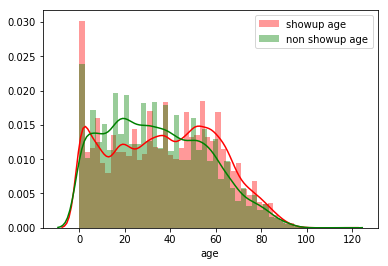

In [30]:
sb.distplot(df[show_up].age, color='r',label='showup age');
sb.distplot(df[no_show].age,color='g', norm_hist=True, label='non showup age');
plt.legend();

<a id='conclusions'></a>
## Conclusions
Steps i took for this analysis
1. i divided the dataset into two group(patients that showed up and those that didn't) for effiecient filtering
2. i explored the data to get insights and answer the questions i posed at the beginning
3. i plotted visuals to further confirm and back up my insights

Let me reiterate my questions and then what i found out:
>in general they are greater proportion of female in our data than male
>1. What are the percentage of male and female that show up
>>The proportion of females thats showed up are greater than that of males
>2. What are the percentage of male and female that don't show up
>>The proportion of females thats didn't showed up are greater than that of males
>3. How does Having a scholarship or not having one affects showing up rate
>> More people without scholarship showed up
>4. How does our independent features correlates wit each other and our dependent variables
>>Most of the independent variable is negatively correlated with our dependent variable Age feature has a slight positive correlation with hipertension feature
>5. what are the mean Age of people that show up and people that don't
>>The mean age of those that showed up is greater than those that didn't show. but we can't conclude that shows up are older in general.

## Linitation in my analysis
>Age has outliers i didn't deal with and this could have affected my calculation in the average age of patients. using median could have been the best aggregation.

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])